# Task 3

# Iris Flower Classification

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
ds=pd.read_csv('IRIS.csv')
ds.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Exploratory Data Analysis

In [3]:
ds.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
ds['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
 ds.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

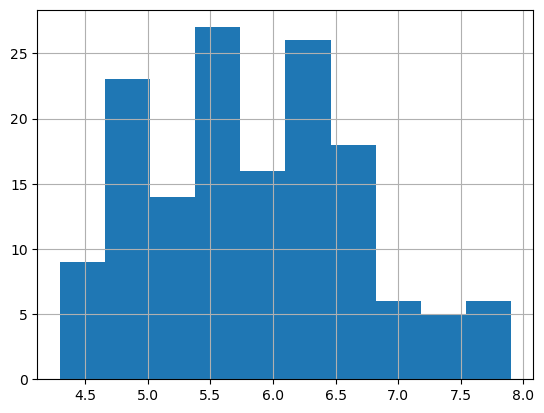

In [7]:
ds['sepal_length'].hist()

<Axes: >

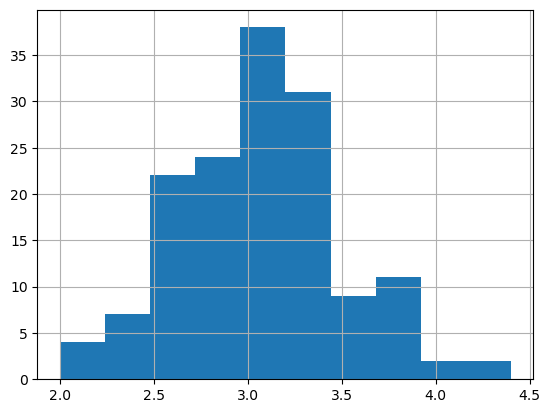

In [8]:
ds['sepal_width'].hist()

<Axes: >

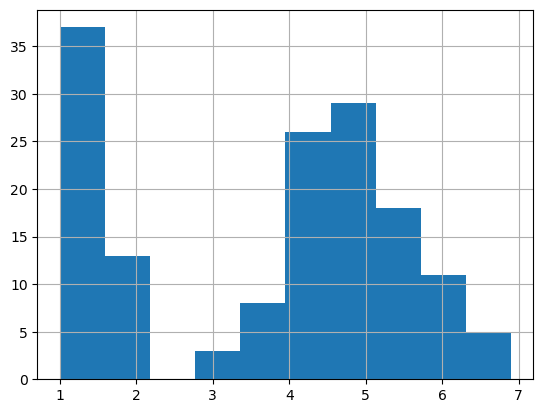

In [9]:
ds['petal_length'].hist()

<Axes: >

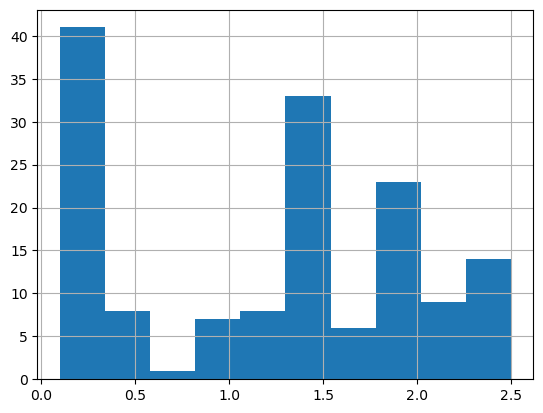

In [10]:
ds['petal_width'].hist()

In [11]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

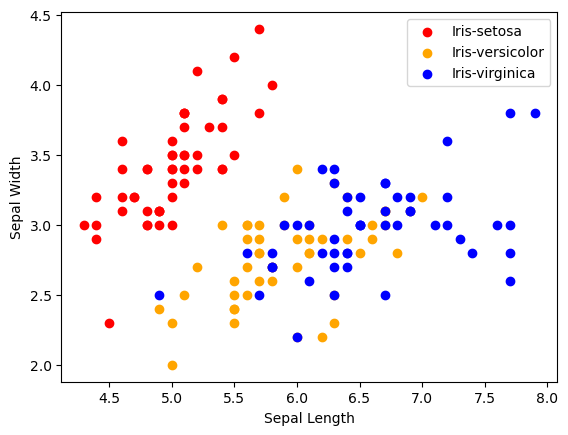

In [12]:
for i in range(3):
    x=ds[ds['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

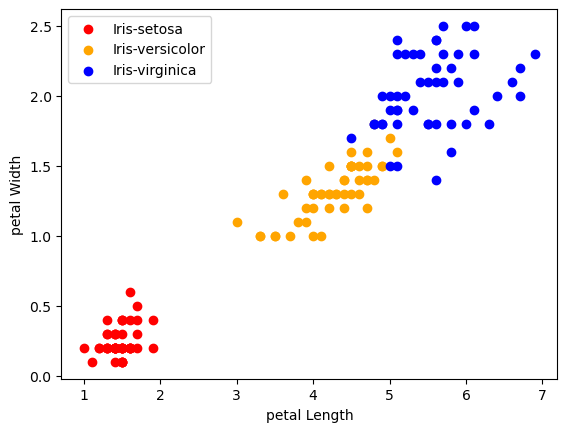

In [13]:
for i in range(3):
    x=ds[ds['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()

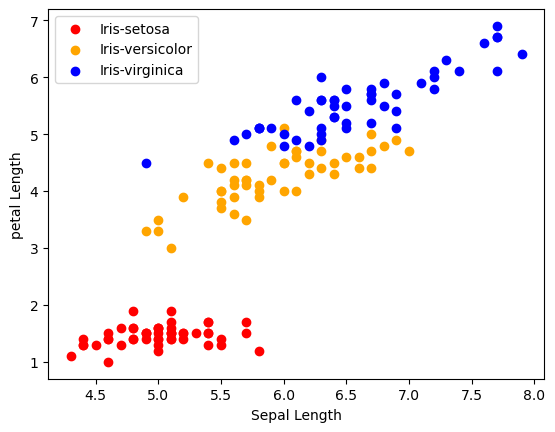

In [14]:
for i in range(3):
    x=ds[ds['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("petal Length")
plt.legend()

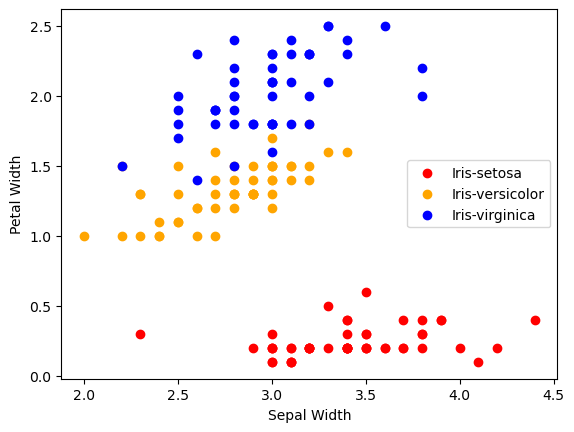

In [15]:
for i in range(3):
    x=ds[ds['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
cols=['sepal_length','sepal_width','petal_length','petal_width','species']
le=LabelEncoder()
for col in cols:
    ds[col]=le.fit_transform(ds[col])

In [18]:
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


In [19]:
ds.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.115744,0.897970,0.818592,0.785590
sepal_width,-0.115744,1.000000,-0.305776,-0.294547,-0.421028
petal_length,0.897970,-0.305776,1.000000,0.944711,0.938885
petal_width,0.818592,-0.294547,0.944711,1.000000,0.947668
species,0.785590,-0.421028,0.938885,0.947668,1.000000


<Axes: >

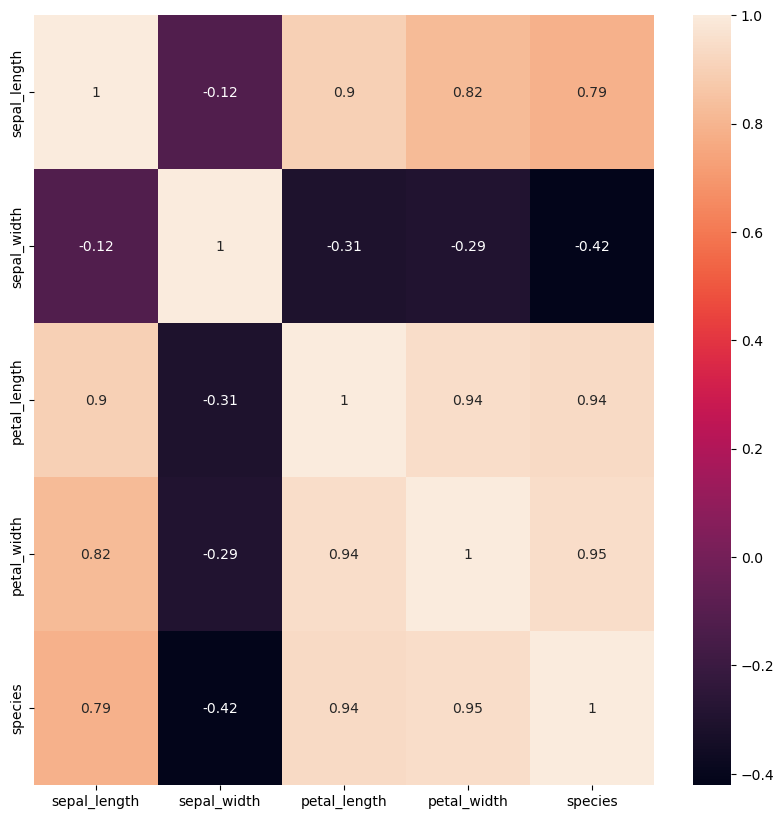

In [20]:
corr=ds.corr()
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax)
    

## Model Training

In [21]:
X = pd.DataFrame(ds , columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
y = ds["species"].values.reshape(-1,1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.5 , random_state = 0)

In [23]:
LogReg = LogisticRegression(solver = "liblinear" , C=50)
LogReg.fit(X_train , y_train.ravel())
y_pred_LR = LogReg.predict(X_test)

In [24]:
print("ACCURATE: ",LogReg.score(X_test,y_test)*100)

ACCURATE:  89.33333333333333
